# Chicago Crimes
Crimes and violence is something that worries the entire world.
From 2016 to 2017 Chicago was one of the top 20 dangerous cities in US
This analysis was created in order to understand:
- Which were the years with more crimes in last 10 years?
- What are the communities with more crimes in last years?
- What are the most common types of crimes? 
- Which is the relation between crimes per community and arrested criminals?

In [83]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
#CSV file
#fileCrimes = 'Crimes_DB.csv'
fileCrimes = 'ChicagoCrimes.csv'
fileCommunity = 'Commareas.csv'

# The correct encoding must be used to read the CSV in pandas
dfcrimes = pd.read_csv(fileCrimes)
dfcommunity = pd.read_csv(fileCommunity)

# Preview of the DataFrames
dfcrimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,CommArea,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,NewColumn
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,0,0,...,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 15:50,41.891399,-87.744385,"(41.891398861, -87.744384567)",NaN
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,1,0,...,67.0,26,1166468.0,1860715.0,2015,02/10/2018 15:50,41.773372,-87.665319,"(41.773371528, -87.665319468)",NaN
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,0,1,...,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 15:50,41.813861,-87.596643,"(41.81386068, -87.596642837)",NaN
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,460,BATTERY,SIMPLE,APARTMENT,0,0,...,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 15:50,41.800802,-87.622619,"(41.800802415, -87.622619343)",NaN
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,0,0,...,25.0,3,1144920.0,1898709.0,2015,02/10/2018 15:50,41.878065,-87.743354,"(41.878064761, -87.743354013)",NaN


In [85]:
#Cleanning Data in Primary Type field
dfcrimes['Primary Type'] = dfcrimes['Primary Type'].replace(
    {'ROBBERY': 'THEFT', 'ASSAULT': 'THEFT', 'MOTOR VEHICLE THEFT': 'THEFT'})
dfcrimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,CommArea,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,NewColumn
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,0,0,...,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 15:50,41.891399,-87.744385,"(41.891398861, -87.744384567)",NaN
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,1,0,...,67.0,26,1166468.0,1860715.0,2015,02/10/2018 15:50,41.773372,-87.665319,"(41.773371528, -87.665319468)",NaN
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,0,1,...,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 15:50,41.813861,-87.596643,"(41.81386068, -87.596642837)",NaN
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,460,BATTERY,SIMPLE,APARTMENT,0,0,...,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 15:50,41.800802,-87.622619,"(41.800802415, -87.622619343)",NaN
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,THEFT,ARMED: HANDGUN,SIDEWALK,0,0,...,25.0,3,1144920.0,1898709.0,2015,02/10/2018 15:50,41.878065,-87.743354,"(41.878064761, -87.743354013)",NaN


In [86]:
dfcommunity.head()

,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,CommArea,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,46004621.16,31027.05451
1,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,36,OAKLAND,36,16913961.04,19565.50615
2,MULTIPOLYGON (((-87.62879823733725 41.80189303...,0,0,0,0,37,FULLER PARK,37,19916704.87,25339.08975
3,MULTIPOLYGON (((-87.6067081256125 41.816813770...,0,0,0,0,38,GRAND BOULEVARD,38,48492503.16,28196.83716
4,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,39,KENWOOD,39,29071741.93,23325.16791


In [87]:
#Table Communities
dfcommunitynew = dfcommunity[['CommArea', 'COMMUNITY']].copy()
dfcommunitynew.head()

,CommArea,COMMUNITY
0,35,DOUGLAS
1,36,OAKLAND
2,37,FULLER PARK
3,38,GRAND BOULEVARD
4,39,KENWOOD


In [88]:
#Combining Dataframes to get community name
combined_crimes_df = pd.merge(dfcrimes, dfcommunitynew, how='left', on='CommArea')
combined_crimes_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,NewColumn,COMMUNITY
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,0,0,...,04B,1144606.0,1903566.0,2015,02/10/2018 15:50,41.891399,-87.744385,"(41.891398861, -87.744384567)",NaN,NaN
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,1,0,...,26,1166468.0,1860715.0,2015,02/10/2018 15:50,41.773372,-87.665319,"(41.773371528, -87.665319468)",NaN,WEST ENGLEWOOD
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,0,1,...,08B,1185075.0,1875622.0,2015,02/10/2018 15:50,41.813861,-87.596643,"(41.81386068, -87.596642837)",NaN,KENWOOD
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,460,BATTERY,SIMPLE,APARTMENT,0,0,...,08B,1178033.0,1870804.0,2015,02/10/2018 15:50,41.800802,-87.622619,"(41.800802415, -87.622619343)",NaN,WASHINGTON PARK
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,THEFT,ARMED: HANDGUN,SIDEWALK,0,0,...,3,1144920.0,1898709.0,2015,02/10/2018 15:50,41.878065,-87.743354,"(41.878064761, -87.743354013)",NaN,NaN


In [90]:
#Crimes per year
year_crimes_df=combined_crimes_df['Year'].value_counts()

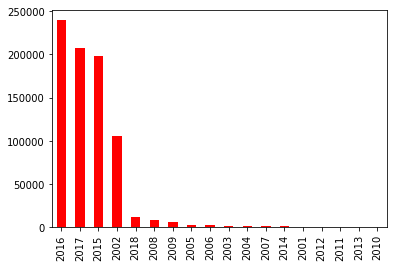

In [92]:
#crimes_peryear
year_crimes_df.plot(kind="bar", facecolor="red")
plt.savefig("CrimesPeryear.png")

In [93]:
community_crimes_df=combined_crimes_df['COMMUNITY'].value_counts()

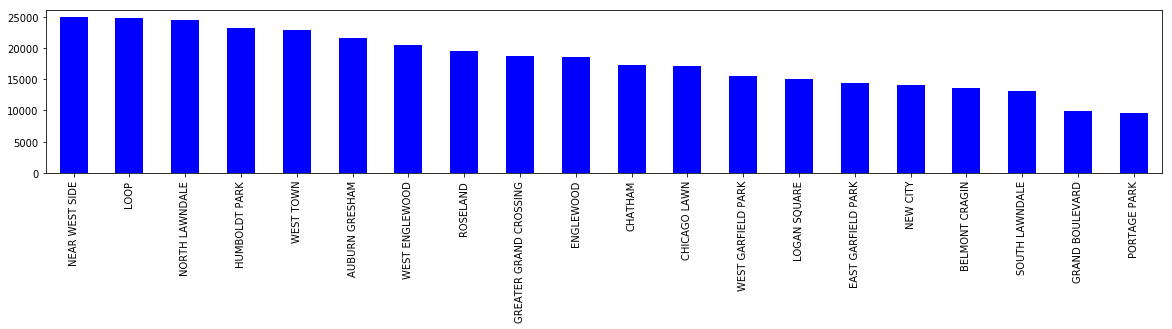

In [94]:
#Crimes per community
community_crimes_df.head(20).plot(kind="bar", facecolor="blue", figsize=(20,3))
plt.savefig("CrimesPerCommunity.png")

In [95]:
type_crimes_df=combined_crimes_df['Primary Type'].value_counts()

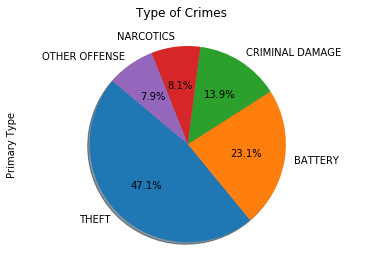

In [96]:
#Crimes per Type, Top 3: Theft, battery(agression), criminal damage

crimes_pie = type_crimes_df.head(5).plot(kind="pie",subplots=True, title=("Type of Crimes "), autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("CrimesPerType.png")

In [70]:
#Location of the crime
location_crimes_df=combined_crimes_df['Location Description'].value_counts()

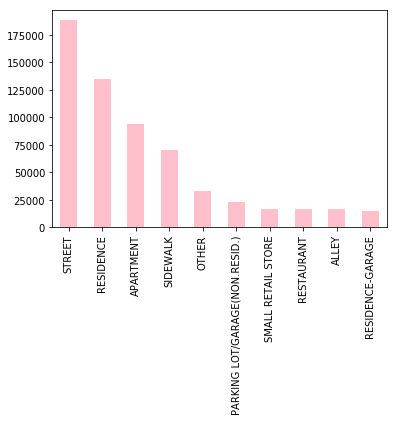

In [97]:
location_crimes_df.head(10).plot(kind="bar", facecolor="pink")
plt.savefig("CrimesPerLocation.png")

In [98]:
# Group our complete data frame 
grouped_community = combined_crimes_df.groupby(['COMMUNITY'])
total_crimes = grouped_community.size()
total_arrested = grouped_community['Arrest'].sum()

# Create a dataframe to hold the above results
arrested={
    'Total Crimes': total_crimes,
    'total_arrested':total_arrested,
}
crimes_summary = pd.DataFrame(arrested)

displayed_crimes_summary = crimes_summary.copy()

In [99]:
ordered_crimes = displayed_crimes_summary.sort_values(by=['Total Crimes'], ascending=False)

In [100]:
ordered_crimes_final= ordered_crimes.head(10).copy

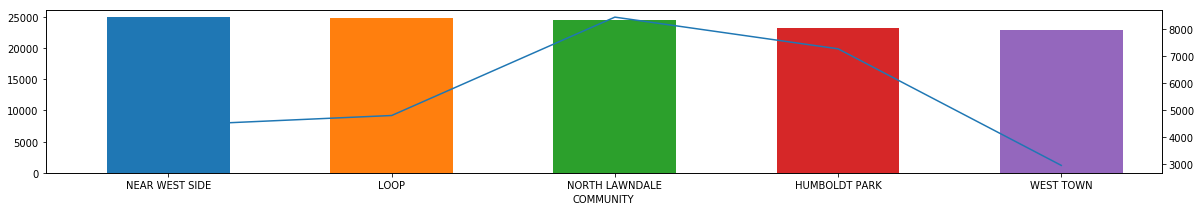

<Figure size 432x288 with 0 Axes>

In [101]:
#Crimes per community(TOP) and number of arrested
width = .55
ordered_crimes.head()['Total Crimes'].plot(kind='bar', width = width,figsize=(20,3))
ordered_crimes.head()['total_arrested'].plot(secondary_y=True)

ax = plt.gca()
plt.xlim([-width, len(ordered_crimes.head()['Total Crimes'])-width])
ax.set_xticklabels(('NEAR WEST SIDE', 'LOOP', 'NORTH LAWNDALE', 'HUMBOLDT PARK', 'WEST TOWN'))

plt.show()
plt.savefig("TopCrimesCommunity_Arrested.png")

In [102]:
ordered_crimes_bottom= ordered_crimes.tail(10).copy

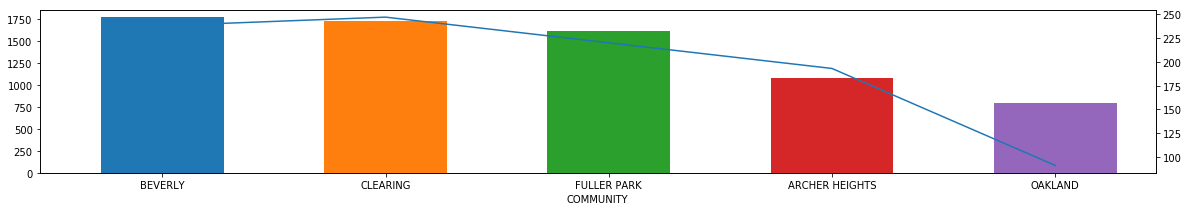

<Figure size 432x288 with 0 Axes>

In [103]:
#Crimes per community (bottom) and arrested
width = .55
ordered_crimes.tail()['Total Crimes'].plot(kind='bar', width = width, figsize=(20,3))
ordered_crimes.tail()['total_arrested'].plot(secondary_y=True)

ax = plt.gca()
plt.xlim([-width, len(ordered_crimes.tail()['Total Crimes'])-width])
ax.set_xticklabels(('BEVERLY', 'CLEARING', 'FULLER PARK', 'ARCHER HEIGHTS', 'OAKLAND'))
plt.show()
plt.savefig("BottomCrimesCommunity_Arrested.png")